# Beer reviews

Background of columns:

- Reviews of beers tasted at an beer convention.
- Review time is automatically generated whereas reviewer has to fill in all other values.
- beer_abv = alchohol by volume. How much of the total volume of the beverage is alcohol. If a beer has an ABV of 4 % and another 7% it means the latter has more alcoholic content in the same amount of liquid, which also means you will feel the effects of it quicker.


Business goal: Increase customer satisfaction by improving on various aspects of beers.

Objective: Identify the aspects that affect the overall rating of each beer.


# Read the data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('beer_reviews.csv')
df = df.iloc[:25000]
print(len(df.index), 'rows')


25000 rows


In [2]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [3]:
print(df.shape[0], 'rows and', df.shape[1],'columns')
df.head()

25000 rows and 13 columns


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
# dataframe containing only review ratings (numeric values)

reviewsdf = df[['brewery_name', 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']]
reviewsdf.describe()

,review_overall,review_aroma,review_appearance,review_palate,review_taste
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,3.852380,3.837280,3.874580,3.825800,3.885820
std,0.735908,0.711128,0.628216,0.712822,0.756833
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000,3.500000
50%,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.500000,4.500000,4.500000,4.500000,4.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In the dataset, there is an average of 3.60 to 3.70 for every aspect review.

# Data Cleaning

In [5]:
df.dtypes

brewery_id              int64
brewery_name           object
review_time             int64
review_overall        float64
review_aroma          float64
review_appearance     float64
review_profilename     object
beer_style             object
review_palate         float64
review_taste          float64
beer_name              object
beer_abv              float64
beer_beerid             int64
dtype: object

Drop columns that are not needed for data understanding

- dropped review_time as it is too unique and would not provide meaningful insights to the data

In [6]:
df.drop(columns=['review_time'], inplace=True)

Remove duplicates, if any

In [7]:
print('Before removing duplicates:' , df.shape)
df.drop_duplicates(inplace=True)
print('After removing duplicates:' , df.shape)

Before removing duplicates: (25000, 12)
After removing duplicates: (24991, 12)


Check for uncomplete data

In [8]:
df.isnull().sum()

brewery_id               0
brewery_name             0
review_overall           0
review_aroma             0
review_appearance        0
review_profilename       2
beer_style               0
review_palate            0
review_taste             0
beer_name                0
beer_abv              1331
beer_beerid              0
dtype: int64

review_profilename and beer_abv are the only columns that contain null values.

Hence, replace null values with 0 in the columnns
- so that the remaining data in the columns and the rows containing null values can still be used.

In [9]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24991 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brewery_id          24991 non-null  int64  
 1   brewery_name        24991 non-null  object 
 2   review_overall      24991 non-null  float64
 3   review_aroma        24991 non-null  float64
 4   review_appearance   24991 non-null  float64
 5   review_profilename  24991 non-null  object 
 6   beer_style          24991 non-null  object 
 7   review_palate       24991 non-null  float64
 8   review_taste        24991 non-null  float64
 9   beer_name           24991 non-null  object 
 10  beer_abv            24991 non-null  float64
 11  beer_beerid         24991 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 2.5+ MB


# Data understanding

In [10]:
n = df.nunique(axis=0) 
print("No.of.unique values in each column :\n",n)

No.of.unique values in each column :
 brewery_id             163
brewery_name           163
review_overall           9
review_aroma             9
review_appearance        9
review_profilename    5801
beer_style              97
review_palate            9
review_taste             9
beer_name             1746
beer_abv               115
beer_beerid           1807
dtype: int64


There are 161 distinct brewery names and brewery IDs, meaning that each brewery has it's own unique brewer name and id.
There are 1636 beer ids but 1582 beer names. This indicates that multiple beers with different id have the same name.

In [11]:
# How many reviews made for each brewery?

import nltk
from nltk.probability import FreqDist

wt_words = list(df['brewery_name'])

final_freq = nltk.FreqDist(wt_words)

final_freq

FreqDist({'Founders Brewing Company': 8872, "Hoppin' Frog Brewery": 3139, "Bluegrass Brewing Co. - East St. Matthew's": 1686, 'Pike Pub & Brewery': 1408, 'Cambridge Brewing Company': 1202, 'Caldera Brewing Company': 889, 'Yazoo Brewing Company': 873, 'Cooperstown Brewing Company': 628, 'Amstel Brouwerij B. V.': 570, 'Trafalgar Ales & Meads': 434, ...})

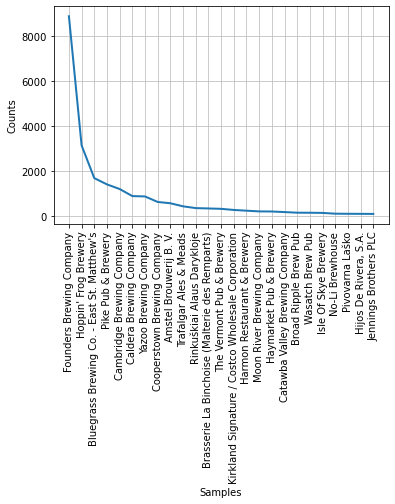

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
# plot the frequency distribution of the top 25 breweries with most number of reviews

sorted_freqdist = FreqDist(final_freq)
sorted_freqdist.plot(25, cumulative=False)

In [13]:
df['brewery_name'].value_counts()

Founders Brewing Company                      8872
Hoppin' Frog Brewery                          3139
Bluegrass Brewing Co. - East St. Matthew's    1686
Pike Pub & Brewery                            1408
Cambridge Brewing Company                     1202
                                              ... 
Raw Microbrewery                                 1
Mt Tabor Brewing                                 1
Richmodis-Bräu                                   1
Ram Restaurant & Brewery                         1
Asmara Breweries                                 1
Name: brewery_name, Length: 163, dtype: int64

In [14]:
# count number of breweries with only 1 review
reviewcount = df.groupby('brewery_name').count()
len(reviewcount[reviewcount['review_overall']==1])

18

This tells us that Hoppin' Frog Brewery has the highest number of reviews of 3139 while 18 breweries only have 1 review.

#### Analysis of review columns 

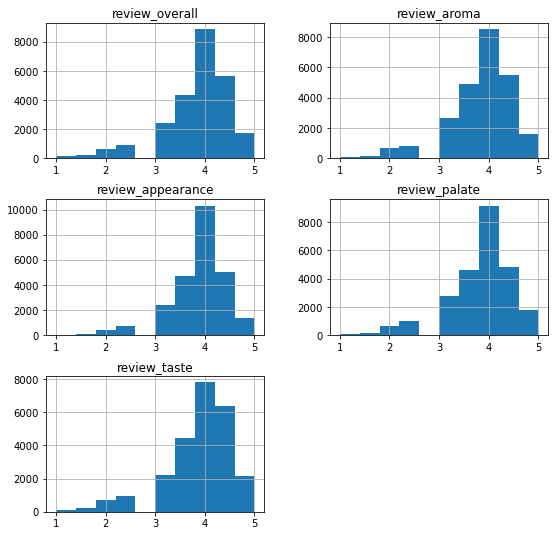

In [15]:
# Histogram of all numeric columns
reviewsdf.hist(figsize=(9,9))
plt.show()

In all review columns,
- 4.0 has the highest number of ratings
- There are no ratings lesser than 1.0

#### Analysis of breweries sorted by review columns 

In [16]:
# average rating for all 5 review portions for each brewery, sort by all review columns

reviewscolsort = reviewsdf.groupby('brewery_name').mean().sort_values(by=list(reviewsdf.columns), ascending=False)
reviewscolsort.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste
brewery_name,,,,,
Zak&#322;ady Piwowarskie w Le&#380;ajsku S.A.,3.250000,2.500000,3.000000,3.000000,3.250000
Yeastie Boys,3.859649,3.798246,3.877193,3.745614,3.833333
Yazoo Brewing Company,3.857961,3.727950,3.812142,3.728522,3.772623
Wm. Kuether Brewing,2.125000,3.125000,3.000000,2.250000,2.250000
William K Busch Brewing Company,3.250000,3.166667,3.750000,3.250000,3.250000


In [17]:
print('Yeastie Boys has' , dict(final_freq).get('Yeastie Boys'), 'reviews.')

Yeastie Boys has 57 reviews.


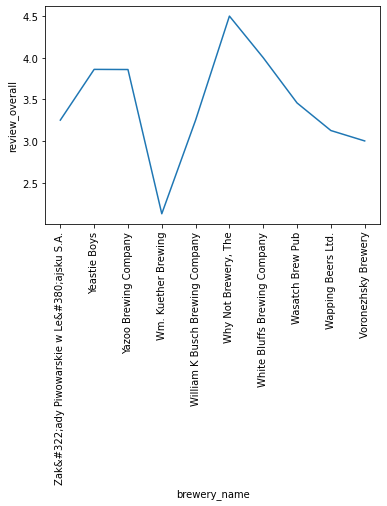

In [18]:
sns.lineplot(x='brewery_name', y='review_overall', data=reviewscolsort[:10])
plt.xticks(rotation='90')
plt.show()

Although Yeastie Boys do not have the highest overall reviews, they have the best ratings when sorted by the various rating columns.


In [19]:
# average rating for all 5 review portions for each brewery, sort by overall_review column
overallreviewsort = reviewsdf.groupby('brewery_name').mean().sort_values(by='review_overall', ascending=False)
overallreviewsort.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste
brewery_name,,,,,
Pivovar Groll,4.5,5.000000,4.000000,3.000000,4.500000
Mt Tabor Brewing,4.5,3.500000,3.500000,4.000000,4.000000
Cornelius Pass Roadhouse & Imbrie Hall (McMenamins),4.5,4.142857,3.571429,4.071429,4.285714
"Why Not Brewery, The",4.5,3.750000,4.000000,4.250000,3.750000
Brauhaus Lemke,4.5,4.000000,3.500000,5.000000,4.000000


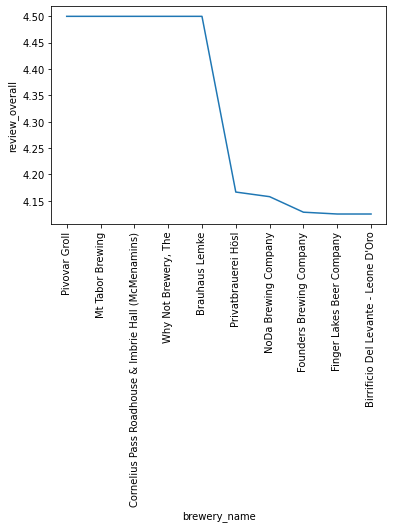

In [20]:
sns.lineplot(x='brewery_name', y='review_overall', data=overallreviewsort[:10])
plt.xticks(rotation='90')
plt.show()

In [21]:
dict(final_freq).get('Pivovar Groll')

1

In [22]:
# breweries that have 4.5 rating or higher

overallmeancount = overallreviewsort['review_overall']>=4.5
print(overallmeancount[overallmeancount])

brewery_name
Pivovar Groll                                          True
Mt Tabor Brewing                                       True
Cornelius Pass Roadhouse & Imbrie Hall (McMenamins)    True
Why Not Brewery, The                                   True
Brauhaus Lemke                                         True
Name: review_overall, dtype: bool


Pivovar Groll has the highest ratings when sorted by overall reviews.

5 breweries have an average 4.5 rating or higher for overall review. However, this may not be a good representation as many breweries such as Pivovar Groll, has the highest ratings but only has one review.
This makes the rankings biased as compared to breweries with more than 100 reviews.

#### Analysis of beer style, sorted by overall review

In [23]:
# average of all 5 review portions for each beer style, sort by overall review

df.groupby('beer_style').mean().sort_values(by='review_overall', ascending=False).head()

C:\Users\zoe\AppData\Local\Temp/ipykernel_30528/3796902740.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('beer_style').mean().sort_values(by='review_overall', ascending=False).head()


,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
beer_style,,,,,,,,
American Double / Imperial Stout,1333.231285,4.327793,4.368436,4.318715,4.322486,4.447765,8.754972,21079.603631
English Dark Mild Ale,4595.947368,4.236842,3.736842,3.947368,3.684211,3.973684,1.589474,23210.578947
English Barleywine,8431.239583,4.218750,4.270833,3.906250,4.072917,4.343750,10.443750,54370.729167
Keller Bier / Zwickel Bier,17532.409091,4.181818,3.727273,3.750000,3.863636,3.954545,3.527273,50764.227273
Russian Imperial Stout,8956.744065,4.161536,4.176187,4.210312,4.293027,4.303412,9.892248,33463.252226


In [24]:
# breweries that uses 'English Barleywine', the highest rated beer style for overall reviews.

df[df['beer_style']=='English Barleywine']['brewery_name'].value_counts()

Hoppin' Frog Brewery                                   49
Cambridge Brewing Company                              32
Broad Ripple Brew Pub                                   6
Birrificio B.O.A. (Birrificio Ostiense Artigianale)     4
Bluegrass Brewing Co. - East St. Matthew's              3
San Francisco Brewing Company                           1
Fernandes Brewery Tap                                   1
Name: brewery_name, dtype: int64

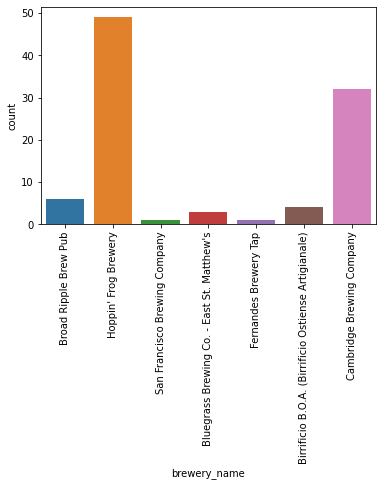

In [25]:
sns.countplot(x=df[df['beer_style']=='English Barleywine']['brewery_name'])
plt.xticks(rotation='90')
plt.show()

English Barleywine is the highest rated beer style and it is used in 6 different breweries.


This beer style has the most number of reviews, 49 reviews, for Hoppin' Frog Brewery.
Whereas San Francisco Brewing Company and Fernandes Brewery Tap only has 1 review mentioning English Barleywine as the beer style.

#### Analysis of beers (beer_name), sorted by overall review

In [26]:
# average of all 5 review portions for each beer name, sort by overall review

df.groupby('beer_name').mean().sort_values(by='review_overall', ascending=False).head()

C:\Users\zoe\AppData\Local\Temp/ipykernel_30528/1384339577.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('beer_name').mean().sort_values(by='review_overall', ascending=False).head()


,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
beer_name,,,,,,,,
Farmhouse Ale,2742.333333,5.0,4.166667,4.0,4.5,4.666667,3.933333,35704.333333
Schwindel Alt,18816.000000,5.0,4.500000,4.5,4.5,5.000000,5.100000,47170.000000
Founders Nutty Professor Nut Stout,1199.000000,5.0,4.000000,4.5,4.5,4.500000,4.200000,20480.000000
Triple OOO,2600.000000,5.0,4.000000,4.0,4.0,4.000000,3.900000,23793.000000
Replic Ale (2010),1454.000000,5.0,4.000000,3.5,4.0,4.000000,0.000000,63467.000000


In [27]:
# what are the breweries that use '99 Wee Heavy Scotch Ale, the highest rated beer name for overall reviews.

print(df[df['beer_name'] == "'99 Wee Heavy Scotch Ale"].shape)
df[df['beer_name'] == "'99 Wee Heavy Scotch Ale"]

(2, 12)


,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
13971,860,The Vermont Pub & Brewery,5.0,4.0,5.0,scottum,Scotch Ale / Wee Heavy,5.0,4.5,'99 Wee Heavy Scotch Ale,0.0,3676
14161,860,The Vermont Pub & Brewery,5.0,5.0,5.0,Andy,Scotch Ale / Wee Heavy,5.0,5.0,'99 Wee Heavy Scotch Ale,0.0,3676


In [28]:
# all beer names used by the brewery, 'The Vermont Pub & Brewery'

len(df[df['brewery_name']=='The Vermont Pub & Brewery']['beer_name'].value_counts())

64

'99 Wee Heavy Scotch Ale is the highest rated beer and it is one of the 64 beers produced by The Vermont Pub & Brewery.
However, the beer name only has 2 reviews which may render the ranking biased.

### Categorise overall rating

In [29]:
# assign categorical ranges according to overall review

conds = [

    (df['review_overall']<1),

    (df['review_overall']>=1)&(df['review_overall']<2),

    (df['review_overall']>=2)&(df['review_overall']<3),

    (df['review_overall']>=3)&(df['review_overall']<4),

    (df['review_overall']>=4),

]
rangename = ['Below 1', '1 to 2', '2 to 3', '3 to 4', '4 and above']

In [30]:
import numpy as np
df['rating_range'] = np.select(conds,rangename)

In [31]:
df[['brewery_name','review_overall', 'rating_range']].head()

,brewery_name,review_overall,rating_range
0,Vecchio Birraio,1.5,1 to 2
1,Vecchio Birraio,3.0,3 to 4
2,Vecchio Birraio,3.0,3 to 4
3,Vecchio Birraio,3.0,3 to 4
4,Caldera Brewing Company,4.0,4 and above


In [32]:
# put all ratings into a list
ratinglist = sorted(list(df['rating_range'].unique()), reverse=True)  # rating range names in df['rating_range']
sort_rating_freq = list(df['rating_range'].value_counts()) # count of each rating range

# calculate pecentage of each rating range
def percentage(s):
    return s/len(df['rating_range'])*100

# print statements
def statements(allstars):
    print(len(df['rating_range']), 'reviews in total \n')

    for i, s in enumerate(sort_rating_freq):
        print(s, ", {:.2f}%".format(percentage(s)), 'of reviews are', ratinglist[i], '\n')


24991 reviews in total 

16277 , 65.13% of reviews are 4 and above 

6779 , 27.13% of reviews are 3 to 4 

1565 , 6.26% of reviews are 2 to 3 

370 , 1.48% of reviews are 1 to 2 



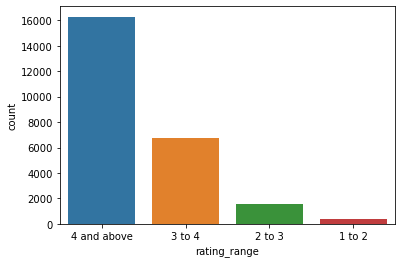

In [33]:
# print results
statements(ratinglist)

# plot the distribution of rating ranges
sns.countplot(x='rating_range', data=df, order=ratinglist)
plt.show()

It is evident that overall, reviewers were satisfied with the beers at the event, with no reviews below 1, and the number of reviews that are 4 and above at 8283 which is 55.20%, more than half of the number of all reviews.


# Pre-processing for Machine Learning

In [34]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_overall', 'review_aroma',
       'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv', 'beer_beerid',
       'rating_range'],
      dtype='object')

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [37]:
int_mod = df[['review_aroma', 
              'review_appearance', 'review_palate', 'review_taste', 
              'beer_abv']]
x = int_mod
y = df['rating_range']

x is used as features for the model, which contains the columns with integer values and are not unique to the row.

y is used as predicted value, which is the categorical rating range for each overall review.

In [38]:
# simple validation; split data
x_train, x_test, y_train, y_test = train_test_split(
x,y,test_size = 0.3,
    
stratify = df.rating_range, random_state=123)

In [39]:
print(y_train.count())
print(y_test.count())

17493
7498


# Modelling

Iterate through the different models and in each iteration:
- Fit the training and test data into the model to train the model
- Use the x_test data to retrieve the prediction provided by the trained model.
- Use the y_test data and the predicted y values and obtain the accuracy score,
- Append the score value and the name of the model into their respective list

In [40]:
# We will iterate through all the models to see which model gives us the highest accuracy after testing.

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=10)))
models.append(('GB', GradientBoostingClassifier()))

fit and predict each model to get accuracy score

In [41]:

names=[]
scores=[]
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    
models_comparison = pd.DataFrame({'Name': names, 'Score':scores})

# sort models by descending to see the model with highest score
models_comparison.sort_values(by='Score', ascending=False)

C:\Users\zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Name,Score
6,GB,0.815017
1,SVM,0.814751
4,GNB,0.795412
0,KNN,0.791811
5,RF,0.778341
2,LR,0.763137
3,DT,0.759669


k-fold cross validation  

Iterate through the different models and in each iteration:
- Making use of Kfold to set the number of splits and the random state. 
- use the cross_val_score to cross validate the x and y data and obtain the average score.
- Append the score value and the name of the model into their respective list

In [42]:
# k fold cross validation  

from sklearn.model_selection import KFold

names=[]
scores=[]

for name, model in models:
    kfold = KFold(n_splits=10, random_state=123, shuffle=True)
    score = cross_val_score(model, x, y, cv=kfold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score':scores})
kf_cross_val.sort_values(by='Score', ascending=False)

C:\Users\zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

,Name,Score
6,GB,0.811212
1,SVM,0.807051
0,KNN,0.787163
4,GNB,0.787163
5,RF,0.773959
2,LR,0.760034
3,DT,0.757993


Accuracy scores of the models either remained the same or improved slightly after performing k-fold cross validation.

# Feature Selection on best model

RFECV (Recursive feature elimination with cross-validation to select features).
using GB model as highest accuracy

In [43]:
# feature selction

from sklearn.feature_selection import RFECV

gb_model = GradientBoostingClassifier()
rfecv = RFECV(estimator=gb_model, step=1, cv=10, scoring='accuracy')
rfecv.fit(x, y)


RFECV(cv=10, estimator=GradientBoostingClassifier(), scoring='accuracy')

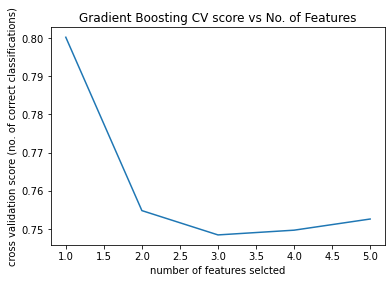

In [44]:
import matplotlib.pyplot as plt

plt.figure()
plt.title('Gradient Boosting CV score vs No. of Features')
plt.xlabel('number of features selcted')
plt.ylabel('cross validation score (no. of correct classifications)')
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

[0.02389808 0.01302184 0.10708151 0.81630494 0.03969363]


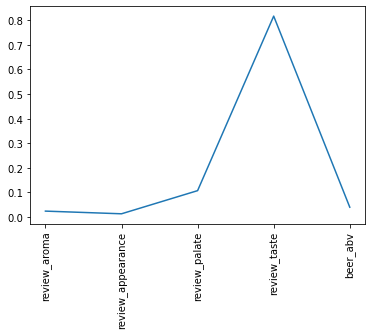

In [45]:
bestmodel = models[-1][1]
featureimpt = bestmodel.feature_importances_
print(featureimpt)

# plot line chart
sns.lineplot(x=x.columns, y=featureimpt)
plt.xticks(rotation='90')
plt.show()

It is determined with RFECV that using 2 features generate the highest accuracy score.

'review_taste' and 'review_palate' have the highest feature importance weight with Gradient Boosting model. 

Hence, after feature selection, I have determined that these two columns are able to generate the highest accuracy score with the Gradient Boosting model.

# Evaluate model

In [46]:
# caluculate accuracy score with new set of features

x_new= df[['review_taste', 'review_palate']]

initial_score = cross_val_score(gb_model, x, y, cv=10, scoring='accuracy').mean()
print('initial accuracy:', initial_score)

fe_score = cross_val_score(gb_model, x_new, y, cv=10, scoring='accuracy').mean()
print('Accuracy after Feature Selection', fe_score)

initial accuracy: 0.7526304281712685
Accuracy after Feature Selection 0.7894864025610244


In [47]:
improved = fe_score-initial_score
print('After feature selection, the accuracy score improved by', improved)

After feature selection, the accuracy score improved by 0.03685597438975596


The best performing model is the gradient boosting classifier using 'review_taste', 'review_palate' as features.

After feature selection and cross validation, this model yields an average accuracy score of 0.771(3.s.f) in predicting rating range of the overall review.

# Conclusion

The taste and palate of the beer has the heaviest impact on the overall review of the beer. Other aspects such as appearance, aroma and beer abv has a significantly lower impact in comparison.

However, ratings for beer taste and palate can be subjective and dependent on the what the customer likes.


Hence, a suggestion to the breweries is to give an overall description of the taste or the beer to customers, so that customers can choose which flavour they like the most.
For example, a beer has a malty and sweet taste, and another beer has a dark and roasty taste. This brief description allows customers to choose a beer more suited for their tastes. 

Not only can this increase customer satisfaction as they taste beers of their liking, this can also improve the reviews of the various beers and breweries.